# **EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering**

---


## De Zoysa A S I
## 220106D
August 6, 2025

LUT length: 256


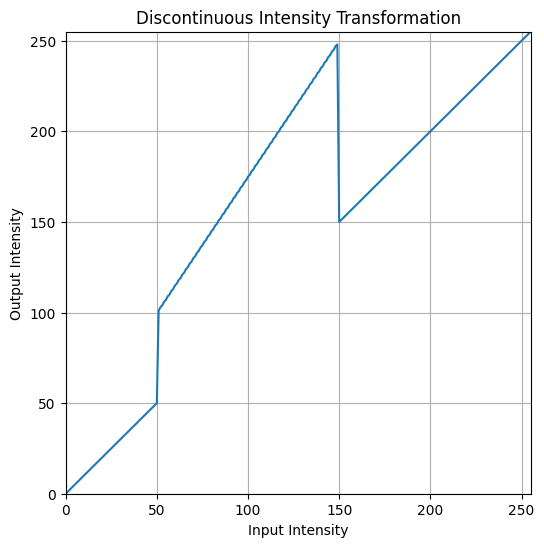

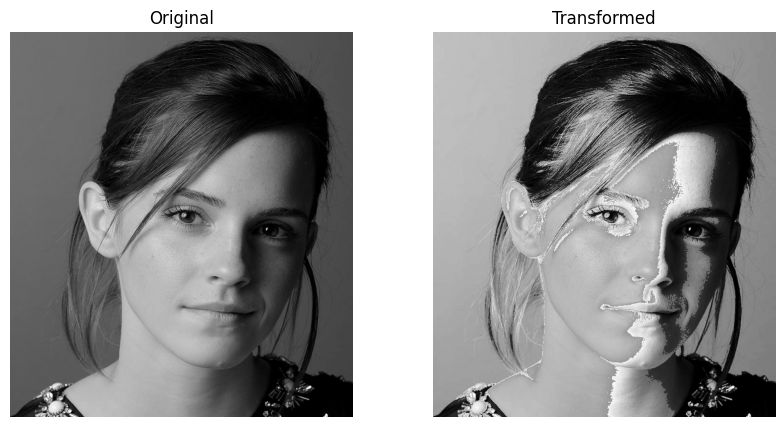

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Segment 1: 0–50 → y = x
t1 = np.linspace(0, 50, 51).astype('uint8')  # 51 values: 0 to 50

# Segment 2: 51–149 → y = 1.5x + 25
x2 = np.arange(51, 150)
y2 = (1.5 * x2 + 25).clip(0, 255).astype('uint8')  # 99 values: 51 to 149

# Segment 3: 150–255 → y = x
t3 = np.linspace(150, 255, 106).astype('uint8')  # 106 values

# Combine all segments
transform = np.concatenate((t1, y2, t3))
print(f"LUT length: {len(transform)}")  # Should be 256

# Optional: plot the function
plt.figure(figsize=(6, 6))
plt.plot(transform)
plt.title('Discontinuous Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.show()

# Load image
img = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply LUT
output = cv.LUT(img, transform)

# Show result
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(output, cmap='gray')
ax[1].set_title("Transformed")
for a in ax:
    a.axis('off')
plt.show()




---



Pixel intensity at (125, 67) is: 163


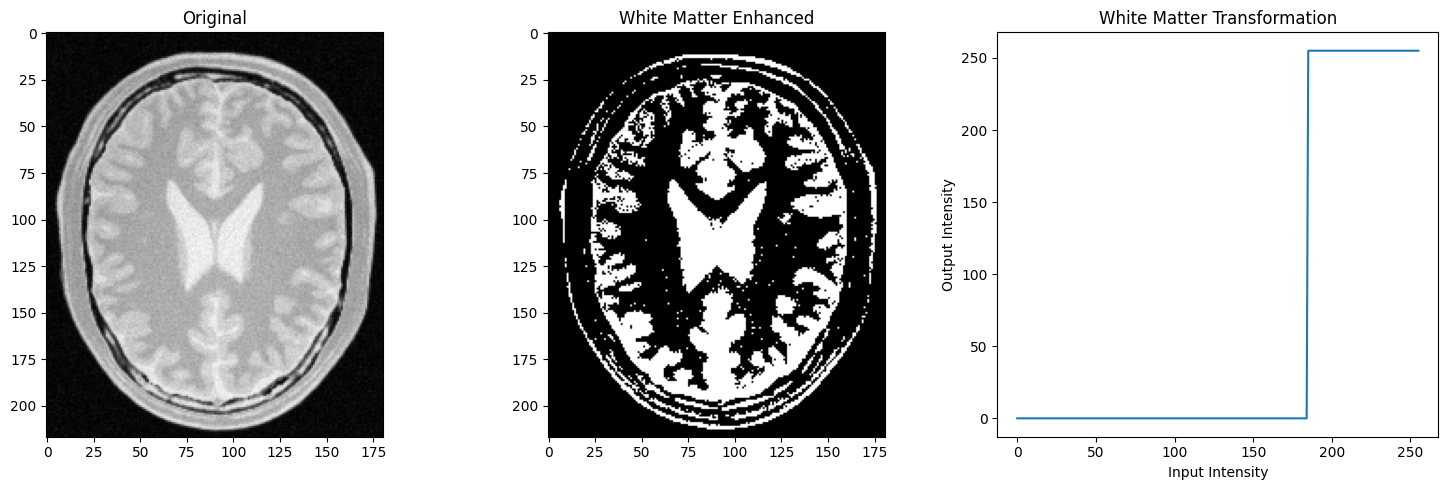

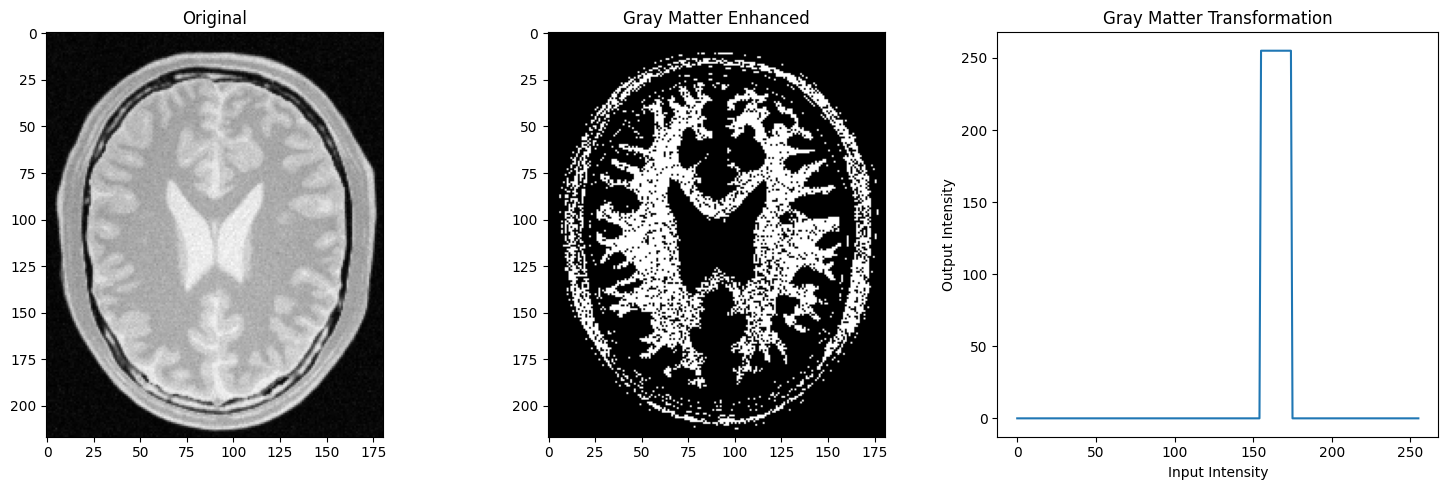

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

row = 125
col = 67

intensity = img[row, col]
print(f"Pixel intensity at ({row}, {col}) is: {intensity}")

t1_white = np.zeros(185, dtype='uint8')
t2_white = np.full(71, 255, dtype='uint8')

transform_white = np.concatenate((t1_white, t2_white))
white_matter_img = cv.LUT(img, transform_white)

t1_gray = np.full(155, 0, dtype='uint8')
t2_gray = np.full(20, 255, dtype='uint8')
t3_gray = np.full(81, 0, dtype='uint8')

transform_gray = np.concatenate((t1_gray, t2_gray, t3_gray))
gray_matter_img = cv.LUT(img, transform_gray)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(white_matter_img, cmap='gray')
ax[1].set_title("White Matter Enhanced")
ax[2].plot(transform_white)
ax[2].set_title("White Matter Transformation")
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
plt.tight_layout()
plt.show()

# Gray matter accentuation
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(gray_matter_img, cmap='gray')
ax[1].set_title("Gray Matter Enhanced")
ax[2].plot(transform_gray)
ax[2].set_title("Gray Matter Transformation")
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
plt.tight_layout()
plt.show()




---



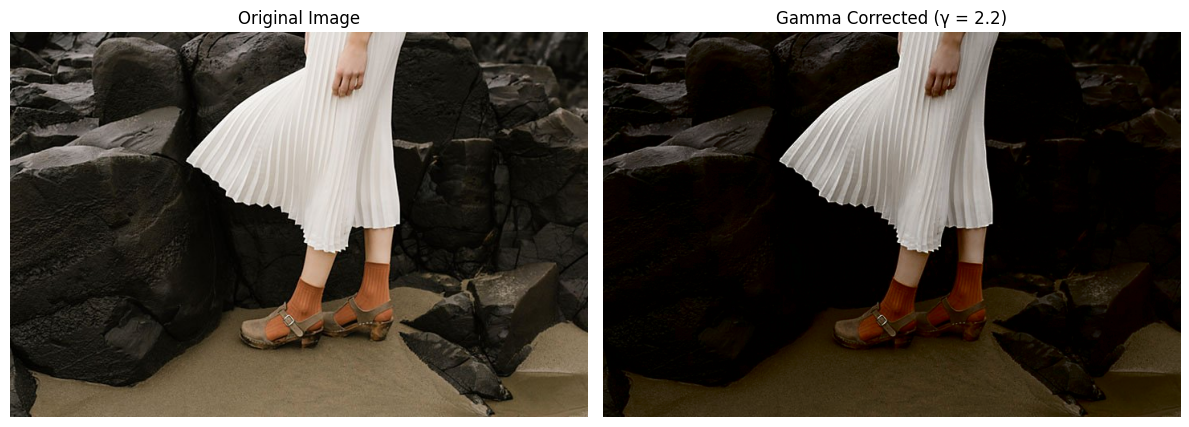

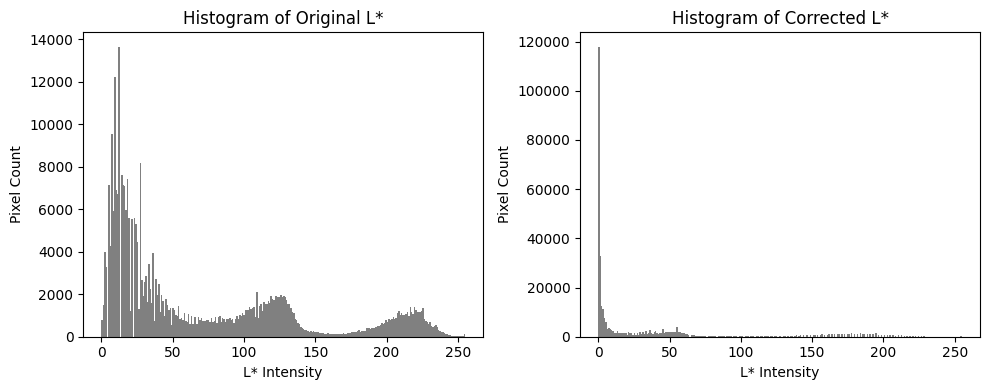

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv.imread('highlights_and_shadows.jpg')
img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2Lab)

L, a, b = cv.split(img_lab)

gamma = 2.2
L_norm = L / 255.0
L_gamma = np.power(L_norm, gamma)
L_corrected = np.uint8(np.clip(L_gamma * 255, 0, 255))

img_lab_corrected = cv.merge((L_corrected, a, b))
img_bgr_corrected = cv.cvtColor(img_lab_corrected, cv.COLOR_Lab2BGR)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(img_bgr_corrected, cv.COLOR_BGR2RGB))
ax[1].set_title(f"Gamma Corrected (γ = {gamma})")
ax[1].axis('off')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(L.ravel(), bins=256, range=(0, 255), color='gray')
ax[0].set_title("Histogram of Original L*")
ax[1].hist(L_corrected.ravel(), bins=256, range=(0, 255), color='gray')
ax[1].set_title("Histogram of Corrected L*")
for a in ax:
    a.set_xlabel("L* Intensity")
    a.set_ylabel("Pixel Count")
plt.tight_layout()
plt.show()




---



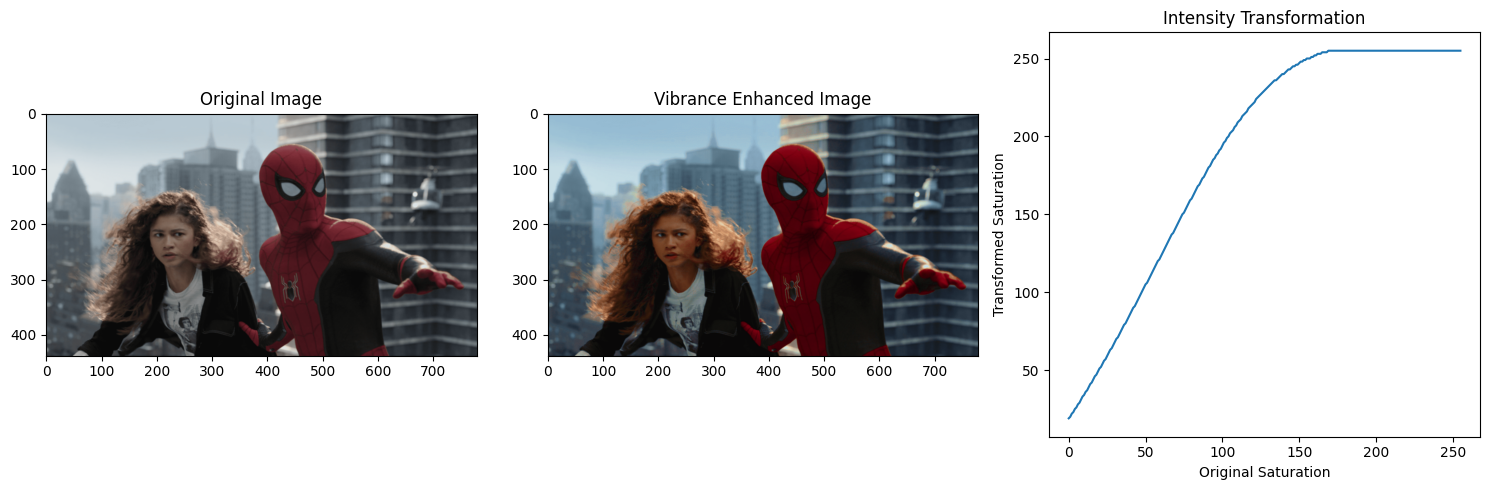

In [4]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv.imread('spider.png')
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)

a = 0.8
sigma = 70
x = np.arange(256)

transformation = x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
transformation = np.clip(transformation, 0, 255).astype(np.uint8)

s_transformed = transformation[s]

hsv_modified = cv2.merge([h, s_transformed, v])
rgb_modified = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15,5))

# Original
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original Image")

# Transformed
plt.subplot(1,3,2)
plt.imshow(rgb_modified)
plt.title("Vibrance Enhanced Image")

# Intensity Transformation Curve
plt.subplot(1,3,3)
plt.plot(x, transformation)
plt.title("Intensity Transformation")
plt.xlabel("Original Saturation")
plt.ylabel("Transformed Saturation")

plt.tight_layout()
plt.show()


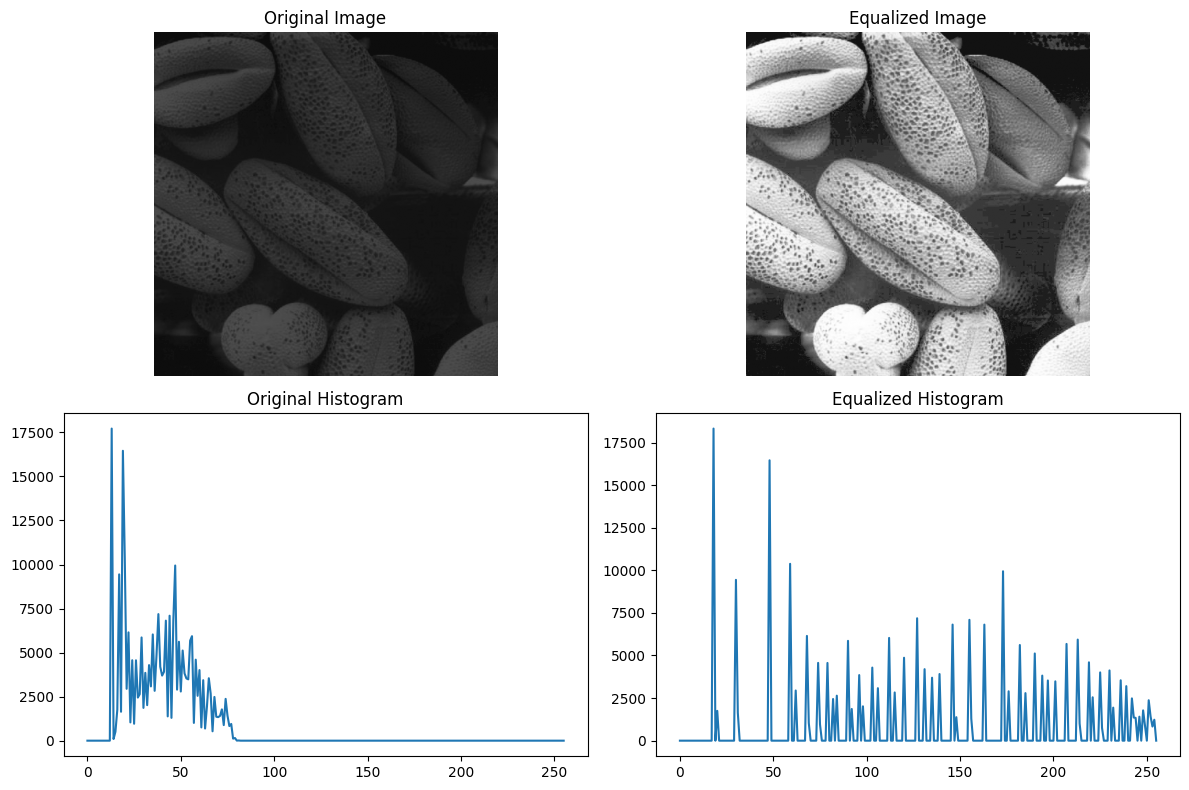

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def custom_hist_equalization(image):

    flat = image.flatten()
    hist, _ = np.histogram(flat, bins=256, range=(0, 256))
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]
    cdf_normalized = cdf_normalized.astype('uint8')
    equalized_image = cdf_normalized[image]

    return equalized_image, hist, np.histogram(equalized_image.flatten(), bins=256, range=(0, 256))[0]


img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)

equalized_img, original_hist, equalized_hist = custom_hist_equalization(img)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(equalized_img, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Equalized Image')
ax[0, 1].axis('off')

ax[1, 0].plot(original_hist)
ax[1, 0].set_title('Original Histogram')

ax[1, 1].plot(equalized_hist)
ax[1, 1].set_title('Equalized Histogram')

plt.tight_layout()
plt.show()


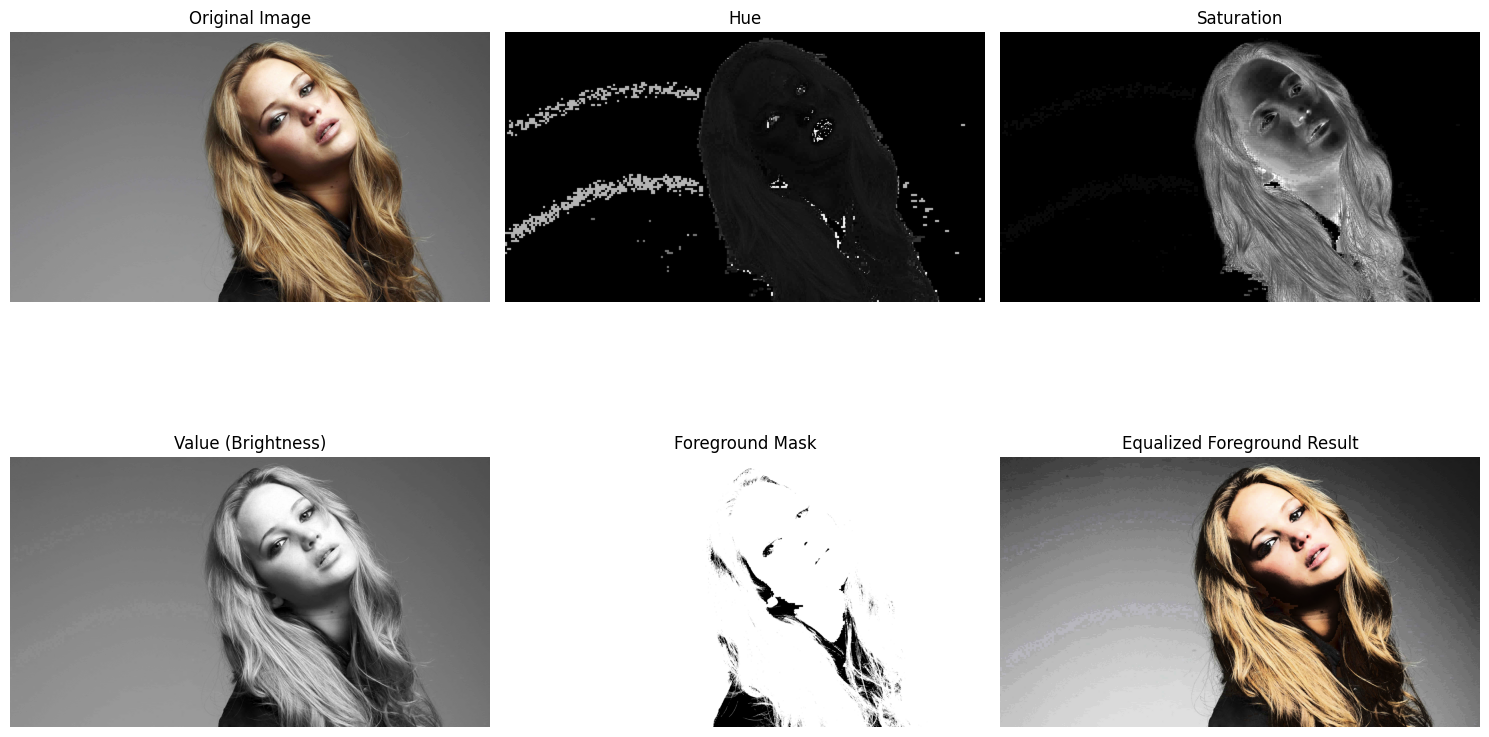

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('jeniffer.jpg')

img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)

threshold_value = 40
_, mask = cv2.threshold(v, threshold_value, 255, cv2.THRESH_BINARY)

foreground = cv2.bitwise_and(v, v, mask=mask)
background = cv2.bitwise_and(v, v, mask=cv2.bitwise_not(mask))

hist = cv2.calcHist([foreground], [0], None, [256], [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * 255 / cdf[-1]
cdf_normalized = cdf_normalized.astype(np.uint8)
equalized_foreground = cdf_normalized[foreground]

v_result = cv2.add(equalized_foreground, background)

final_hsv = cv2.merge([h, s, v_result])
hist_eq_result = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(h, cmap='gray')
plt.title("Hue")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(s, cmap='gray')
plt.title("Saturation")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(v, cmap='gray')
plt.title("Value (Brightness)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(mask, cmap='gray')
plt.title("Foreground Mask")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(hist_eq_result, cv2.COLOR_BGR2RGB))
plt.title("Equalized Foreground Result")
plt.axis('off')

plt.tight_layout()
plt.show()


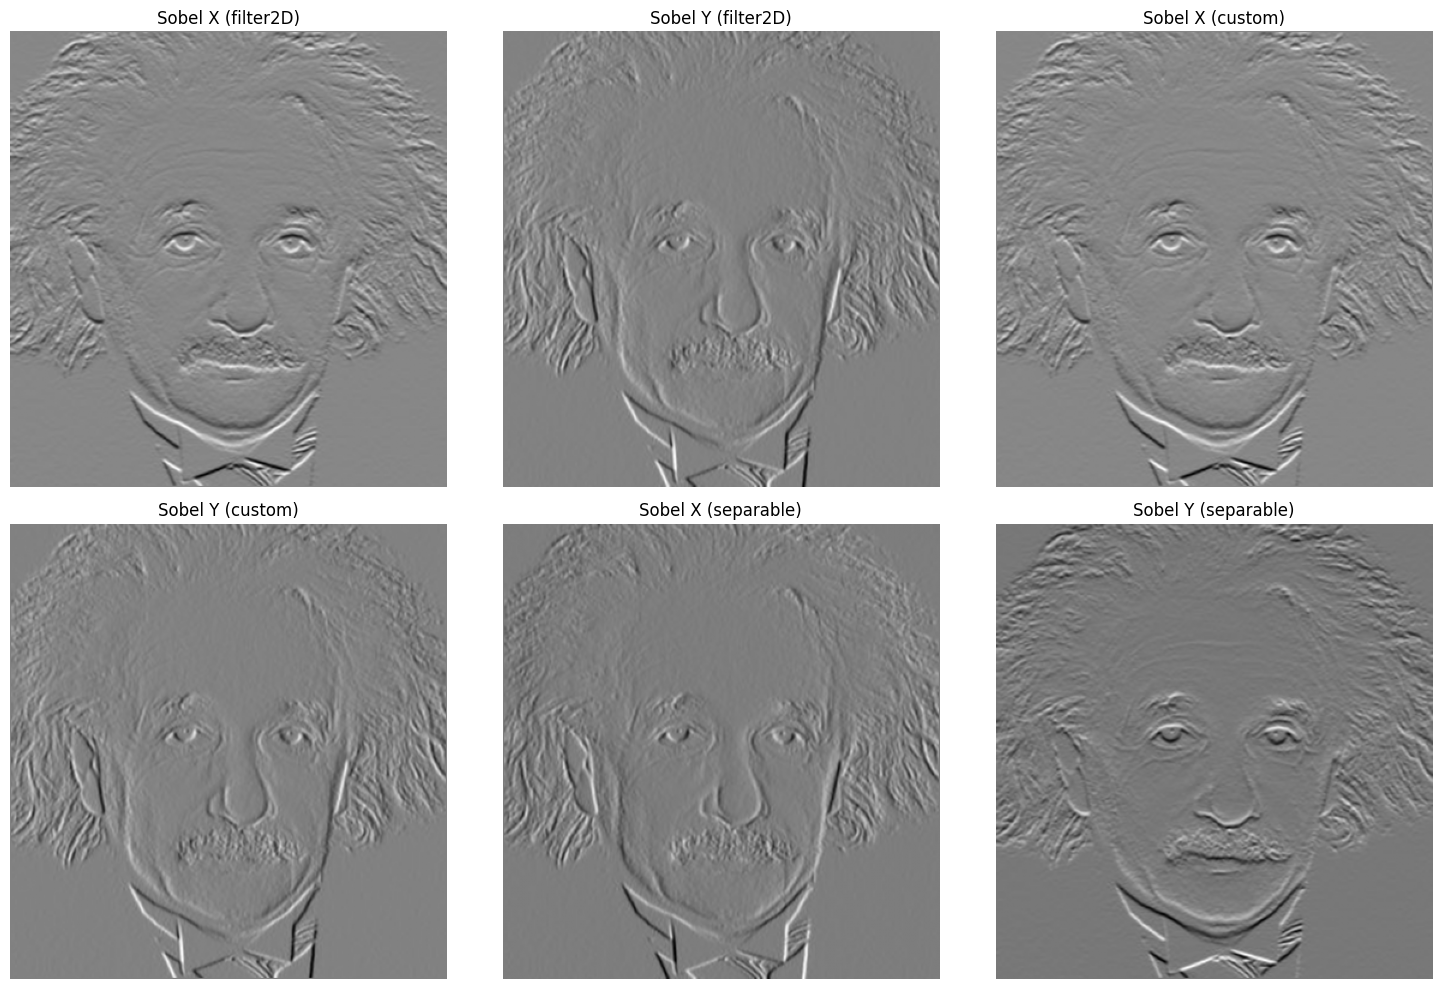

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

# (a)
im = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
assert im is not None

sobel_x = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

sobel_y = np.array([[-1,  0,  1],
                    [-2,  0,  2],
                    [-1,  0,  1]], dtype=np.float32)

im_x_a = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y_a = cv.filter2D(im, cv.CV_64F, sobel_y)


# (b)
def custom_filter(image, kernel):
    k_hh, k_hw = kernel.shape[0]//2, kernel.shape[1]//2
    h, w = image.shape
    img_float = image.astype(float)
    result = np.zeros_like(img_float)

    for i in range(k_hh, h - k_hh):
        for j in range(k_hw, w - k_hw):
            region = img_float[i-k_hh:i+k_hh+1, j-k_hw:j+k_hw+1]
            result[i, j] = np.sum(region * kernel)
    return result

im_x_b = custom_filter(im, sobel_x)
im_y_b = custom_filter(im, sobel_y)


#  (c)
g = np.array([[1],
              [2],
              [1]], dtype=np.float32)           # column vector
d = np.array([[1, 0, -1]], dtype=np.float32)    # row vector

# X-direction: derivative in X, smooth in Y
sobel_x_sep = cv.filter2D(cv.filter2D(im, cv.CV_64F, g), cv.CV_64F, d)
# Y-direction: derivative in Y, smooth in X
sobel_y_sep = cv.filter2D(cv.filter2D(im, cv.CV_64F, d.T), cv.CV_64F, g.T)


titles = ['Sobel X (filter2D)', 'Sobel Y (filter2D)',
          'Sobel X (custom)', 'Sobel Y (custom)',
          'Sobel X (separable)', 'Sobel Y (separable)']

images = [im_x_a, im_y_a,
          im_x_b, im_y_b,
          sobel_x_sep, sobel_y_sep]

plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [9]:
import cv2 as cv
import numpy as np

def zoom_nearest(img, s):
    h, w = img.shape[:2]
    new_h, new_w = int(h * s), int(w * s)
    result = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)

    for i in range(new_h):
        for j in range(new_w):
            orig_x = int(i / s)
            orig_y = int(j / s)
            result[i, j] = img[orig_x, orig_y]
    return result

def zoom_bilinear(img, s):
    h, w = img.shape[:2]
    new_h, new_w = int(h * s), int(w * s)
    result = np.zeros((new_h, new_w, img.shape[2]), dtype=np.float32)

    for i in range(new_h):
        for j in range(new_w):
            x = i / s
            y = j / s

            x0 = int(np.floor(x))
            x1 = min(x0 + 1, h - 1)
            y0 = int(np.floor(y))
            y1 = min(y0 + 1, w - 1)

            a = x - x0
            b = y - y0

            top = (1 - b) * img[x0, y0] + b * img[x0, y1]
            bottom = (1 - b) * img[x1, y0] + b * img[x1, y1]
            result[i, j] = (1 - a) * top + a * bottom

    return np.clip(result, 0, 255).astype(img.dtype)

def normalized_ssd(img1, img2):
    diff_sq = np.sum((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    denom = np.sum(img2.astype(np.float32) ** 2)
    return diff_sq / denom

original = cv.imread("im01.png")
small = cv.imread("im01small.png")

scale_factor = 4

zoom_nn = zoom_nearest(small, scale_factor)
zoom_bl = zoom_bilinear(small, scale_factor)


nssd_nn = normalized_ssd(zoom_nn, original)
nssd_bl = normalized_ssd(zoom_bl, original)

print("NSSD (Nearest-Neighbor):", nssd_nn)
print("NSSD (Bilinear):", nssd_bl)



NSSD (Nearest-Neighbor): 0.012057949
NSSD (Bilinear): 0.017718948


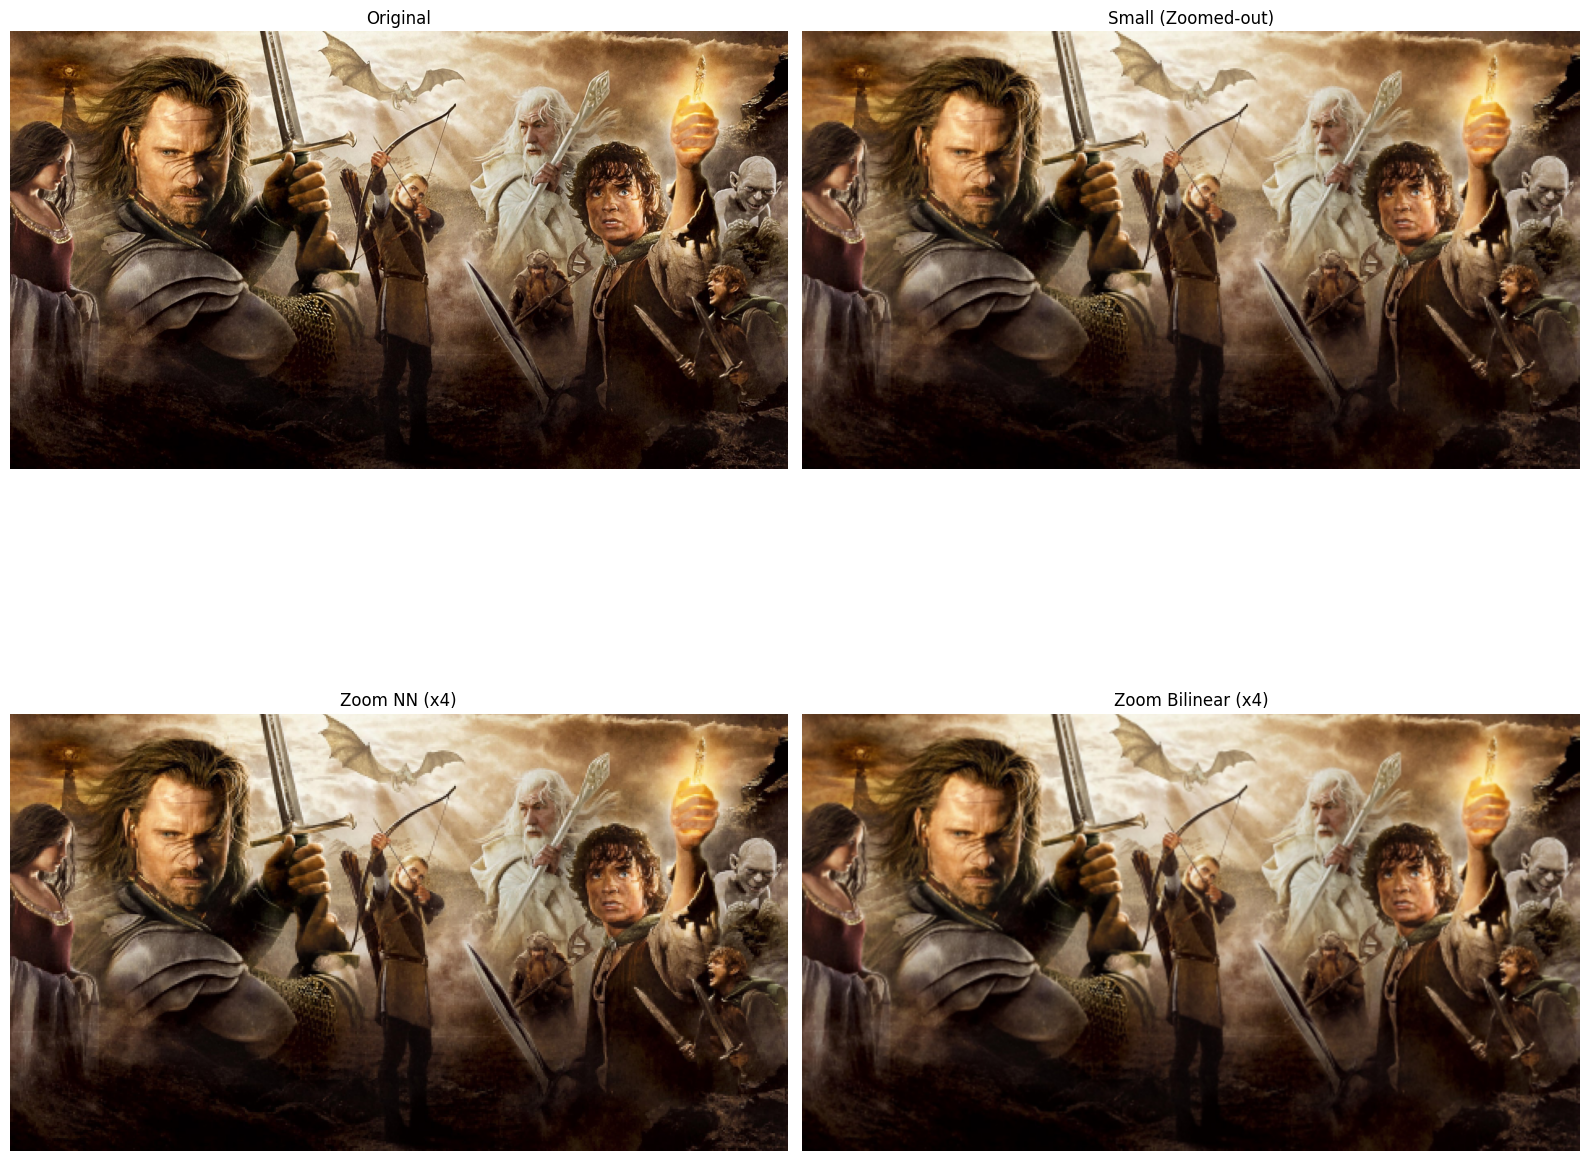

In [12]:

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.ravel()  # flatten the 2x2 array into a 1D list

images = [original, small, zoom_nn, zoom_bl]
titles = ["Original", "Small (Zoomed-out)",
          f"Zoom NN (x{scale_factor})",
          f"Zoom Bilinear (x{scale_factor})"]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()



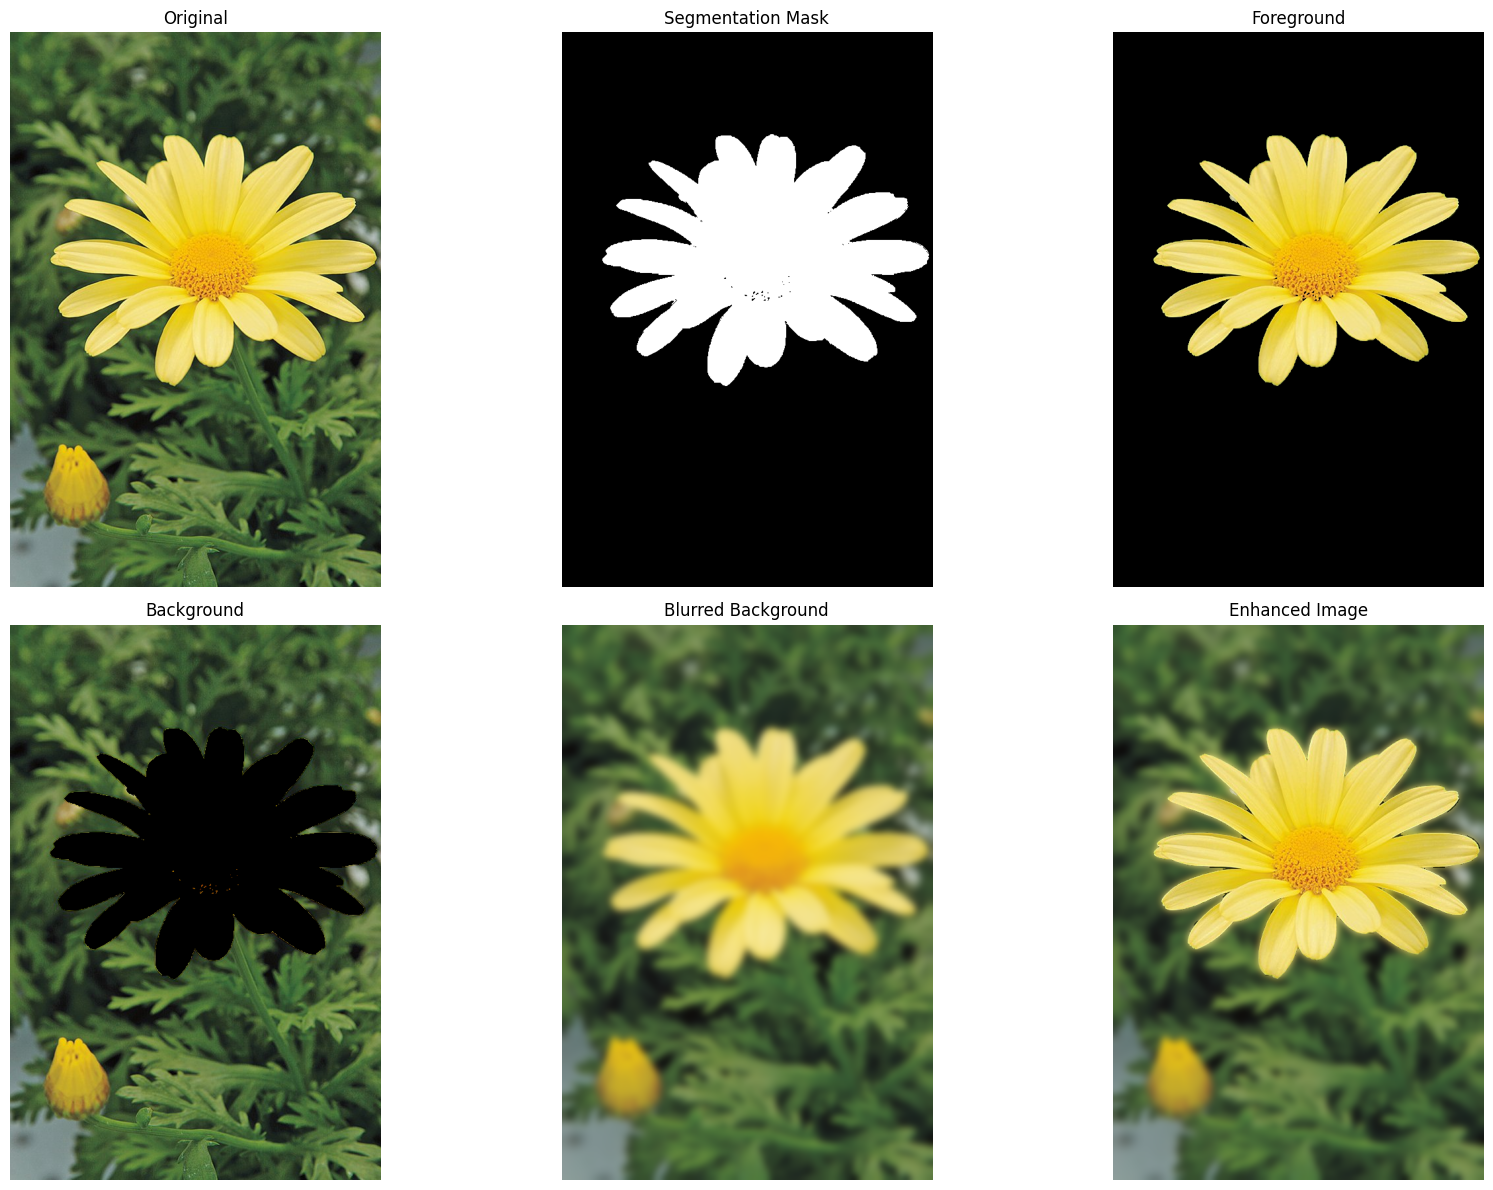

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("daisy.jpg")
mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (20, 20, img.shape[1] - 10, img.shape[0] - 250)

cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

foreground = img * mask2[:, :, np.newaxis]
background = img * (1 - mask2[:, :, np.newaxis])

blurred_bg = cv.GaussianBlur(img, (35, 35), 0)

enhanced = blurred_bg.copy()
enhanced[mask2 == 1] = img[mask2 == 1]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

titles = ["Original", "Segmentation Mask", "Foreground", "Background",
          "Blurred Background", "Enhanced Image"]
images = [
    img,
    (mask2 * 255).astype("uint8"),
    foreground,
    background,
    blurred_bg,
    enhanced
]

for ax, img_disp, title in zip(axes, images, titles):
    if len(img_disp.shape) == 2:
        ax.imshow(img_disp, cmap="gray")
    else:
        ax.imshow(cv.cvtColor(img_disp, cv.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


 **(c) Why the background near the edge is dark
This happens because:**


grabCut produces a soft boundary between foreground and background, but we binarized the mask.

Any pixels at the flower edges that were classified as background get replaced by blurred/dark values.

The Gaussian blur averages dark background pixels with light ones, so the edge region loses brightness.

Essentially, it's a halo effect due to imperfect segmentation.



